In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(1)

## What is Information?

- information should be additive when they are independent
- information must be high when it is rare, small when it is common.
- information of an event can be defined as the reciprocal of the probability of the event.
$$
    I(X) = 1/P(X)
$$
- So, information is a function of the probability of a discrete random varaible, and can be defined.

## What is Entropy?

- the average of the information of a random variable is 

$$
    \begin{align}
      H(X) =  \mathbb{E}_X\big[ I(X) \big] & = \sum_i I(x_i) P(x_i) \\
                                     & = \sum_i P(x_i) \log\big(1/P(x_i)\big) \\
                                     & = - \sum_i P(x_i) \log P(x_i)
    \end{align}
$$

- Entropy of a binary random variable $X \sim \{ 0, 1 \}$ with probability $P(X=0) = p$ (Bernoulli distribution)

$$
    H(X) = -\big(p \log p + (1-p) \log(1-p) \big) = H(p)
$$

In [2]:
def H2(p, log='log2'):
    logf = np.log2 if log=='log2' else np.log10
    H_p = - (p * logf(p) + (1-p) * logf(1-p))
    return H_p

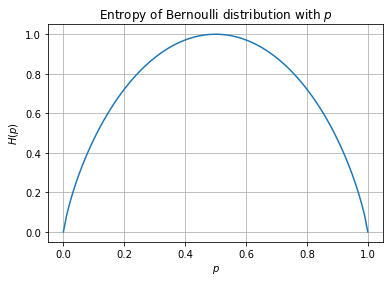

In [3]:
eps = 0.00001
p = np.linspace(0+eps, 1-eps, 100)
H_p = H2(p)

plt.plot(p, H_p);
plt.grid(True)
plt.title('Entropy of Bernoulli distribution with $p$');
plt.xlabel('$p$')
plt.ylabel('$H(p)$');

- When $p=0.5$ the entropy is maximum; the average of information quanity carried by the distribution (or the random variable) is maximum.

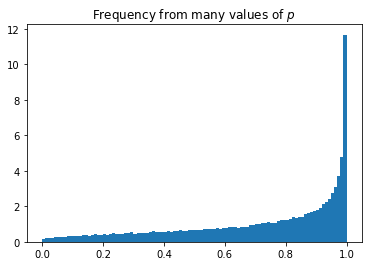

In [4]:
Hx = np.array([ H2(p) for i, p in enumerate(np.random.uniform(size=(100000))) ])

plt.hist(Hx, bins=100, density=True);
plt.title('Frequency from many values of $p$ ');

### Categorical Distribution (N discrete events)

- Let's think about a discrete random variable $N$ dimension. 
- We have $N$ events $\{x_i\}$ and probabilities $p_i$ with constraint $\sum_i p_i = 1$
  
- For a uniform distribution with dimension $N$, the entropy is 

$$
    H(X) = -\sum_{i=1}^N 1/N \log (1/N) = \sum 1/N \log N = \log N
$$


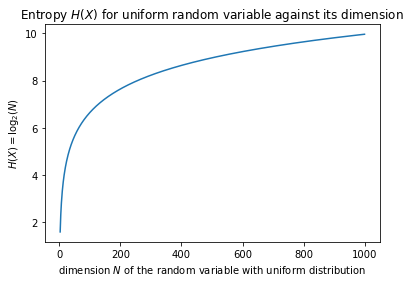

In [5]:
n = np.arange(3, 1000)
H_p = np.log2(n)

plt.plot(n, H_p)
plt.xlabel('dimension $N$ of the random variable with uniform distribution')
plt.ylabel('$H(X) = \log_2(N)$')
plt.title('Entropy $H(X)$ for uniform random variable against its dimension');

- For a fixed dimension, e.g. $N=16$, the entropy $H$ of the uniform random variable is $H(X) = \log_2(N) = 4$.
    - For a set of 16 symbols, we need 4 bits to represent them in binary number system. So we may think that the symbols are assumed to have probability $1/N$ equally.
- What if the distribution is not uniform?

In [6]:
def H(p, logf=np.log2):
    entropy = -sum(p*logf(p))
    return entropy

In [7]:
N = 16
Hx = []
for i in range(100000):
    p = np.random.uniform(low=0., high=1., size=(N)) # create a discrete distribution
    p /= sum(p) # normalize so that p is a discrete distribution
    Hx.append(H(p))
Hx = sorted(np.array(Hx))
print(f'min(H) = {Hx[0]:.4}  max(H) = {Hx[-1]:.4}')

min(H) = 3.074  max(H) = 3.975


When we tested many cases of discrete distributions with $N=16$, the entropy values varied from 3.18 to 3.97. In terms of bit length, there were cases that we need only 3.2 bits to represent 16 symbols. Note that 4 bits is the maximum entropy. This is the basis of the variable-length coding theory. Refer to [Huffman coding algorithm](https://en.wikipedia.org/wiki/Huffman_coding).

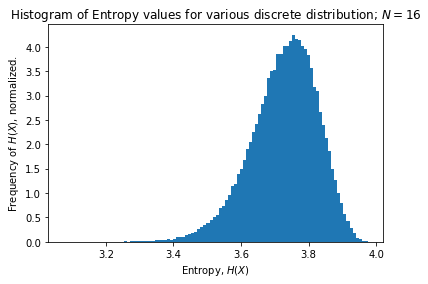

In [8]:
plt.hist(Hx, bins=100, density=True)
plt.xlabel('Entropy, $H(X)$')
plt.ylabel('Frequency of $H(X)$, normalized.')
plt.title('Histogram of Entropy values for various discrete distribution; $N=16$');

## Cross Entropy
https://en.wikipedia.org/wiki/Cross_entropy

- Definition:

$$
    H(p,q) = \mathbb{E}_{X\sim p} \big[ q(X) \big] = - \sum_i P(x_i) \log_2 Q(x_i)
$$

- Cross entropy can be interpreted as the expected message-length per datum when a wrong distribution $q$ is assumed while the data actually follows a distribution $p$.

In [9]:
def cross_entropy(p, q, log=np.log2):
    return -sum(p*log(q))

In [10]:
# create a random distribution of dim 16
p = np.random.uniform(0, 1, size=(16))
p /= sum(p)

# Let us assume that we empirical $q$ is assumed to be uniform even though the true density is $p$.
q = np.ones(16) / 16.
cr = cross_entropy(p, q)
print('cross entropy (p,q) = ', cr)
print('cross entropy (q,p) = ', cross_entropy(q, p))

cross entropy (p,q) =  3.9999999999999996
cross entropy (q,p) =  4.2647811846748205


In [11]:
def random_dist(N=16):
    """ create a random distribution of dim 16 """
    p = np.random.uniform(0, 1, size=(16))
    p /= sum(p)
    return p

p = random_dist()

q_unif = np.ones(16) / 16. # this case means that we have chosen to use the maximum entropy configuration. Since we are using maximum bit length, the cross entropy is always 4.

print('cross entropy (q,p) = ', cross_entropy(p, q_unif))

cr_samples = [cross_entropy(random_dist(), q_unif) for _ in range(10000)]

print(min(cr_samples), max(cr_samples))

cross entropy (q,p) =  4.0
3.999999999999998 4.000000000000002


- Above case is when $p$ may have an entropy (code length, bit length) value less than 4 which is the maximum. Empirically, one may simply assume that $p$ was uniform constant $1/N$, so $q = 1/N$. In this case the cross entropy is always 4 since the user is already using the maximum entropy coding scheme.

- Below; let's try best to this simpleness and made an approximate empirical distribution $q$ (which was supposed to be almost the same as $p$ not actually not).

In [12]:
p = random_dist()
print('Entropy of p: ', H(p))

cr_samples = [cross_entropy(p, random_dist()) for _ in range(100000)] # q is simulated using random_dist()
print('cr range    : ', min(cr_samples),  max(cr_samples))

Entropy of p:  3.8174790680859023
cr range    :  3.8910310822703 6.395132986994819


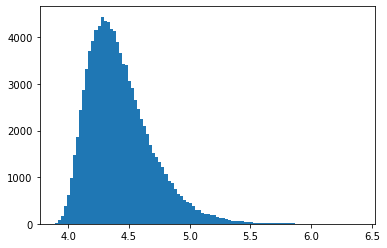

In [13]:
plt.hist(cr_samples, bins=100);

- Mostly, randomly chosen empirical distribution $q$ resulted in larger values of cross entropy. This is why CR can be used as a loss function to estimate probability distribution from data.

### Cross-entropy loss function and logistic regression

- The true probability $p_i$ is the true label, and the given distribution $q_i$ is the predicted value of the current machine learning model.

- Logistic regression is used to classify observations into two possible classes (often simply labelled 0 and 1).
- The output of the ML model for a given observation (a feature vector $x$) can be interpreted as a probability.

- The probability is modeled using the **logistic function**:
$$
    q_{y=1} = \hat{y} = \sigma(w\cdot x) = \frac{1}{1+\exp\{-w\cdot x\}}
$$
where the vector $w$ is optimized through some appropriate algorithm such as gradient descent.
- Similarly, the complementary probability of finding the output $y=0$ is simply given by:
$$
    q_{y=0} = 1 - q_{y=1}
$$
- Having set up our notation, $p_i$ and $q_i$ we can use cross entropy to get a measure of dissimilarity between $p$ and $q$:
$$
    \begin{align}
        H(p,q) & = -\sum_i p_i \log q_i \\
                & = -y \log\hat{y} - (1-y)\log(1-\hat{y}) \\
                & = 
                    \begin{cases}
                        -\log\hat{y} & \text{ if $y=1$ } \\
                        -\log (1-\hat{y}) & \text{ if $y=0$ }
                    \end{cases}
    \end{align}
$$
where $\hat{y}$ is substituted with $\sigma(w\cdot x)$.

- Note that this may be extended to Categorical case where more than two classes are given by replacing $\sigma(\cdot)$ by soft-max function.

- Typically logistic regression optimizes the log-loss for all the observations. Given $N$ independent samples the loss is:
$$
    \begin{align}
        \mathcal{L}(w) & = \frac{1}{N}\sum_{n=1}^N H(p_n, q_n) \\
        & = \frac{1}{N}\sum_{n=1}^N \bigg[-y \log\hat{y}_n - (1-y)\log(1-\hat{y}_n) \bigg]
     \end{align}
$$
where $\hat{y}_n = \sigma(w\cdot x_n)$.

## KL Divergence

- Unfortunately, the cross entropy does not show how far $q$ is from $p$. This may be overcome by using KL-divergence:

$$
    \begin{align}
        KL(p||q) & = H(p,q) - H(p) \\
                 & = \mathbb{E}_{p} (\log 1/q) - \mathbb{E}_{p} (\log 1/p) \\
                 & = \mathbb{E}_{p} (\log p/q)
    \end{align}
$$

In [14]:
def KLDiv(p, q, log=np.log2):
    return -sum(p*log(q)) - (-sum(p*log(p)))

kld range    :  0.07802856007799486 2.7029574194547448


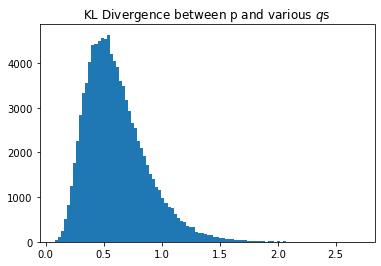

In [15]:
kld_samples = [KLDiv(p, random_dist()) for _ in range(100000)] # q is simulated using random_dist()

print('kld range    : ', min(kld_samples),  max(kld_samples))
plt.hist(kld_samples, bins=100);
plt.title('KL Divergence between p and various $q$s');

End.